# SVM 기초

## 1. linear SVM

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [11]:
iris=load_iris()
X=iris.data[:,:2]
y=iris.target

print(X.shape, y.shape)

(150, 2) (150,)


Support Vector Classifier

In [1]:
from sklearn.svm import SVC

In [18]:
C=1
clf = SVC(kernel='linear',C=C)

clf.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
y_pred=clf.predict(X)

confusion_matrix(y,y_pred)  

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]], dtype=int64)

## 2. kernel SVM

- LinearSVC

In [27]:
clf=SVC(C=C,kernel='linear',max_iter=10000)
clf.fit(X,y)

y_pred=clf.predict(X)
confusion_matrix(y,y_pred)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]], dtype=int64)

- radial basis function

In [28]:
# default : kernel='rbf'
clf2 = SVC(gamma=0.7,C=C,max_iter=10000)
clf2.fit(X,y)

y_pred2=clf2.predict(X)
confusion_matrix(y,y_pred2)

array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0, 13, 37]], dtype=int64)

- polynomial kernel

In [29]:
clf3 = SVC(kernel='poly',degree=3,C=C,gamma='auto')
clf3.fit(X,y)

y_pred3 = clf3.predict(X)
confusion_matrix(y,y_pred3)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 16, 34]], dtype=int64)

## 3. Visualization

In [36]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [48]:
C = 1.0 

models = (SVC(kernel='linear', C=C),    # linear
          SVC(C=C, gamma=0.7),  # rbf
          SVC(kernel='poly', degree=3, gamma='auto', C=C),
          SVC(kernel='poly', degree=5, gamma='auto', C=C))# poly

models = (clf.fit(X, y) for clf in models)

In [49]:
titles = ('SVC_Linear Kernel',
          'SVC_RBF(Gaussian) Kernel',
          'SVC_Polynomial Kernel(degree=3)',
         'SVC_Polynomial Kernel(degree=5)')

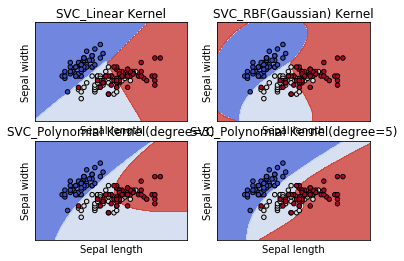

<Figure size 5760x5760 with 0 Axes>

In [50]:
fig, sub = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()